## Objective :

This dataset documents the start and end dates of U.S. presidential terms, including the president’s name, political party, and term duration. It is commonly used to:

Teach data wrangling and date/time manipulation.

Create time-based charts (e.g., timeline plots or shaded regions by party).

Analyze trends in leadership, party dominance, or term lengths.



### Data Fetching
A reusable function that downloads the raw text content (CSV) from a URL.

Checks if the request was successful (status_code == 200), otherwise prints an error.

raw_url stores the URL of the presidential.csv file.

data stores the raw CSV content (as a string) fetched from GitHub

In [20]:
import requests
import pandas as pd
import numpy as np

def raw_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data")
        return None

raw_url = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/presidential.csv"
data = raw_data(raw_url)

print(data)

"name","start","end","party"
"Eisenhower",1953-01-20,1961-01-20,"Republican"
"Kennedy",1961-01-20,1963-11-22,"Democratic"
"Johnson",1963-11-22,1969-01-20,"Democratic"
"Nixon",1969-01-20,1974-08-09,"Republican"
"Ford",1974-08-09,1977-01-20,"Republican"
"Carter",1977-01-20,1981-01-20,"Democratic"
"Reagan",1981-01-20,1989-01-20,"Republican"
"Bush",1989-01-20,1993-01-20,"Republican"
"Clinton",1993-01-20,2001-01-20,"Democratic"
"Bush",2001-01-20,2009-01-20,"Republican"
"Obama",2009-01-20,2017-01-20,"Democratic"
"Trump",2017-01-20,2021-01-20,"Republican"



### Load CSV into DataFrame

StringIO(data) turns the string into a file-like object so pandas can read it.

parse_dates=["start", "end"]: automatically parses the date columns.

presidential: a pandas DataFrame containing structured data of U.S. presidents.

In [21]:
from io import StringIO

presidential = pd.read_csv(StringIO(data), parse_dates=["start", "end"])
presidential

,name,start,end,party
0,Eisenhower,1953-01-20,1961-01-20,Republican
1,Kennedy,1961-01-20,1963-11-22,Democratic
2,Johnson,1963-11-22,1969-01-20,Democratic
3,Nixon,1969-01-20,1974-08-09,Republican
4,Ford,1974-08-09,1977-01-20,Republican
5,Carter,1977-01-20,1981-01-20,Democratic
6,Reagan,1981-01-20,1989-01-20,Republican
7,Bush,1989-01-20,1993-01-20,Republican
8,Clinton,1993-01-20,2001-01-20,Democratic
9,Bush,2001-01-20,2009-01-20,Republican


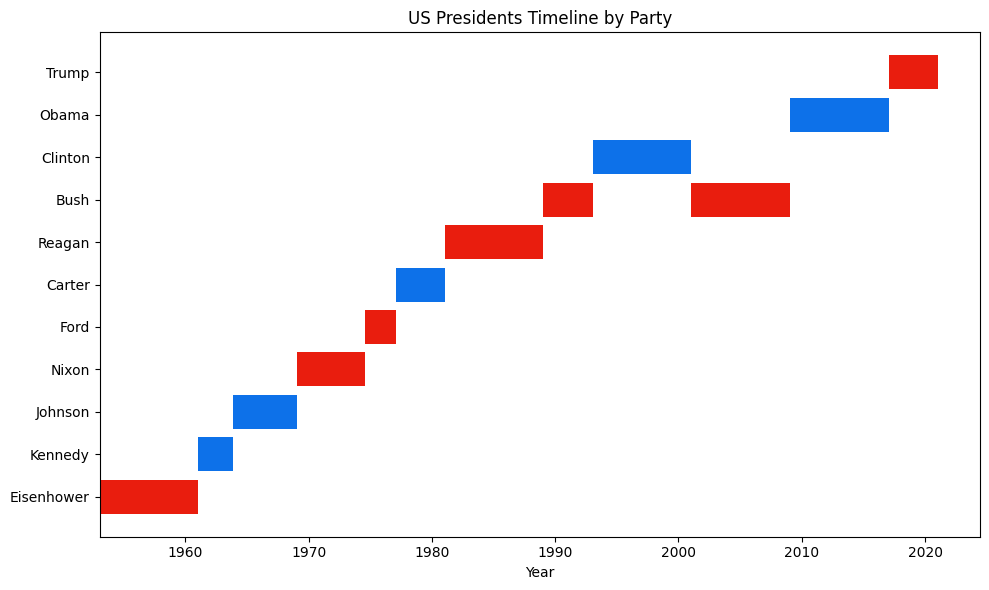

In [36]:
# Sort by start date
presidential = presidential.sort_values("start")

# Set color palette
party_colors = {
    "Republican": "#E91D0E",
    "Democratic": "#0D71E9"
}

# Plot
plt.figure(figsize=(10, 6))
for i, row in presidential.iterrows():
    plt.barh(row["name"], (row["end"] - row["start"]).days, left=row["start"], color=party_colors[row["party"]])

plt.xlabel("Year")
plt.title("US Presidents Timeline by Party")
plt.tight_layout()
plt.show()

.info() gives summary of columns, non-null counts, and data types.

In [22]:
presidential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    12 non-null     object        
 1   start   12 non-null     datetime64[ns]
 2   end     12 non-null     datetime64[ns]
 3   party   12 non-null     object        
dtypes: datetime64[ns](2), object(2)
memory usage: 516.0+ bytes


[['name', 'party']]: selects specific columns to view.

In [23]:
print(presidential[['name', 'party']])

          name       party
0   Eisenhower  Republican
1      Kennedy  Democratic
2      Johnson  Democratic
3        Nixon  Republican
4         Ford  Republican
5       Carter  Democratic
6       Reagan  Republican
7         Bush  Republican
8      Clinton  Democratic
9         Bush  Republican
10       Obama  Democratic
11       Trump  Republican


Filters rows for presidents from the Republican party.

In [24]:
print(presidential[presidential['party'] == 'Republican'])

          name      start        end       party
0   Eisenhower 1953-01-20 1961-01-20  Republican
3        Nixon 1969-01-20 1974-08-09  Republican
4         Ford 1974-08-09 1977-01-20  Republican
6       Reagan 1981-01-20 1989-01-20  Republican
7         Bush 1989-01-20 1993-01-20  Republican
9         Bush 2001-01-20 2009-01-20  Republican
11       Trump 2017-01-20 2021-01-20  Republican


### Conditional Filtering: Democrats After 1973

Filters Democratic presidents who started their term after 1973.

Shows only their names.

In [25]:
presidential_wt_dem = presidential[(presidential['start'].dt.year > 1973) & (presidential['party'] == 'Democratic')]
print(presidential_wt_dem[['name']])

       name
5    Carter
8   Clinton
10    Obama


### Calculate Term Length

Calculates length of each presidential term in years.

Uses .dt.days to get number of days and divides by 365.25 (accounts for leap years).

Adds a new column term.length.

In [26]:
presidential['term.length'] = ((presidential['end'] - presidential['start']).dt.days / 365.25).round(2)
print(presidential)

          name      start        end       party  term.length
0   Eisenhower 1953-01-20 1961-01-20  Republican         8.00
1      Kennedy 1961-01-20 1963-11-22  Democratic         2.84
2      Johnson 1963-11-22 1969-01-20  Democratic         5.16
3        Nixon 1969-01-20 1974-08-09  Republican         5.55
4         Ford 1974-08-09 1977-01-20  Republican         2.45
5       Carter 1977-01-20 1981-01-20  Democratic         4.00
6       Reagan 1981-01-20 1989-01-20  Republican         8.00
7         Bush 1989-01-20 1993-01-20  Republican         4.00
8      Clinton 1993-01-20 2001-01-20  Democratic         8.00
9         Bush 2001-01-20 2009-01-20  Republican         8.00
10       Obama 2009-01-20 2017-01-20  Democratic         8.00
11       Trump 2017-01-20 2021-01-20  Republican         4.00


### Add 'Elected' Year Column

Creates a new column elected = one year before the term started.

In the U.S., elections are typically held the year before the president assumes office

In [27]:
presidential['elected'] = (presidential['start'].dt.year) -1
print(presidential)

          name      start        end       party  term.length  elected
0   Eisenhower 1953-01-20 1961-01-20  Republican         8.00     1952
1      Kennedy 1961-01-20 1963-11-22  Democratic         2.84     1960
2      Johnson 1963-11-22 1969-01-20  Democratic         5.16     1962
3        Nixon 1969-01-20 1974-08-09  Republican         5.55     1968
4         Ford 1974-08-09 1977-01-20  Republican         2.45     1973
5       Carter 1977-01-20 1981-01-20  Democratic         4.00     1976
6       Reagan 1981-01-20 1989-01-20  Republican         8.00     1980
7         Bush 1989-01-20 1993-01-20  Republican         4.00     1988
8      Clinton 1993-01-20 2001-01-20  Democratic         8.00     1992
9         Bush 2001-01-20 2009-01-20  Republican         8.00     2000
10       Obama 2009-01-20 2017-01-20  Democratic         8.00     2008
11       Trump 2017-01-20 2021-01-20  Republican         4.00     2016


### Handle Anomalies in 'Elected' Column

Replaces certain invalid or non-standard elected years (1962 and 1973) with NaN (missing value).

These may correspond to presidents who took office unexpectedly (e.g., after resignation or death).

In [28]:
presidential.loc[presidential['elected'].isin([1962, 1973]), 'elected'] = np.nan
print(presidential)

          name      start        end       party  term.length  elected
0   Eisenhower 1953-01-20 1961-01-20  Republican         8.00   1952.0
1      Kennedy 1961-01-20 1963-11-22  Democratic         2.84   1960.0
2      Johnson 1963-11-22 1969-01-20  Democratic         5.16      NaN
3        Nixon 1969-01-20 1974-08-09  Republican         5.55   1968.0
4         Ford 1974-08-09 1977-01-20  Republican         2.45      NaN
5       Carter 1977-01-20 1981-01-20  Democratic         4.00   1976.0
6       Reagan 1981-01-20 1989-01-20  Republican         8.00   1980.0
7         Bush 1989-01-20 1993-01-20  Republican         4.00   1988.0
8      Clinton 1993-01-20 2001-01-20  Democratic         8.00   1992.0
9         Bush 2001-01-20 2009-01-20  Republican         8.00   2000.0
10       Obama 2009-01-20 2017-01-20  Democratic         8.00   2008.0
11       Trump 2017-01-20 2021-01-20  Republican         4.00   2016.0


Renames the column term.length to term_length for Python-friendly syntax and consistency with naming conventions (no dot notation).

In [29]:
presidential.rename(columns = {'term.length' : 'term_length'}, inplace = True)
print(presidential)

          name      start        end       party  term_length  elected
0   Eisenhower 1953-01-20 1961-01-20  Republican         8.00   1952.0
1      Kennedy 1961-01-20 1963-11-22  Democratic         2.84   1960.0
2      Johnson 1963-11-22 1969-01-20  Democratic         5.16      NaN
3        Nixon 1969-01-20 1974-08-09  Republican         5.55   1968.0
4         Ford 1974-08-09 1977-01-20  Republican         2.45      NaN
5       Carter 1977-01-20 1981-01-20  Democratic         4.00   1976.0
6       Reagan 1981-01-20 1989-01-20  Republican         8.00   1980.0
7         Bush 1989-01-20 1993-01-20  Republican         4.00   1988.0
8      Clinton 1993-01-20 2001-01-20  Democratic         8.00   1992.0
9         Bush 2001-01-20 2009-01-20  Republican         8.00   2000.0
10       Obama 2009-01-20 2017-01-20  Democratic         8.00   2008.0
11       Trump 2017-01-20 2021-01-20  Republican         4.00   2016.0


Displays the updated DataFrame.

First sort: Shows presidents sorted by longest term (descending).

In [30]:
print(presidential.sort_values(by = ['term_length'], ascending = False))

          name      start        end       party  term_length  elected
0   Eisenhower 1953-01-20 1961-01-20  Republican         8.00   1952.0
9         Bush 2001-01-20 2009-01-20  Republican         8.00   2000.0
10       Obama 2009-01-20 2017-01-20  Democratic         8.00   2008.0
6       Reagan 1981-01-20 1989-01-20  Republican         8.00   1980.0
8      Clinton 1993-01-20 2001-01-20  Democratic         8.00   1992.0
3        Nixon 1969-01-20 1974-08-09  Republican         5.55   1968.0
2      Johnson 1963-11-22 1969-01-20  Democratic         5.16      NaN
5       Carter 1977-01-20 1981-01-20  Democratic         4.00   1976.0
11       Trump 2017-01-20 2021-01-20  Republican         4.00   2016.0
7         Bush 1989-01-20 1993-01-20  Republican         4.00   1988.0
1      Kennedy 1961-01-20 1963-11-22  Democratic         2.84   1960.0
4         Ford 1974-08-09 1977-01-20  Republican         2.45      NaN


Second sort: Adds tie-breaking sort by:
- Party (alphabetically),
- Election year (earlier years first).

In [31]:
print(presidential.sort_values(by = ['term_length', 'party', 'elected'], ascending = [False, True, True]))

          name      start        end       party  term_length  elected
8      Clinton 1993-01-20 2001-01-20  Democratic         8.00   1992.0
10       Obama 2009-01-20 2017-01-20  Democratic         8.00   2008.0
0   Eisenhower 1953-01-20 1961-01-20  Republican         8.00   1952.0
6       Reagan 1981-01-20 1989-01-20  Republican         8.00   1980.0
9         Bush 2001-01-20 2009-01-20  Republican         8.00   2000.0
3        Nixon 1969-01-20 1974-08-09  Republican         5.55   1968.0
2      Johnson 1963-11-22 1969-01-20  Democratic         5.16      NaN
5       Carter 1977-01-20 1981-01-20  Democratic         4.00   1976.0
7         Bush 1989-01-20 1993-01-20  Republican         4.00   1988.0
11       Trump 2017-01-20 2021-01-20  Republican         4.00   2016.0
1      Kennedy 1961-01-20 1963-11-22  Democratic         2.84   1960.0
4         Ford 1974-08-09 1977-01-20  Republican         2.45      NaN


N: Total number of presidents.

first_year: Earliest term start year.

last_yeaer: Latest term end year (note: typo in "last_yeaer").

num_DEMS: Number of Democratic presidents.

years: Total number of presidential years (sum of all term lengths).

avg_term_length: Average term length (in years), rounded to 2 decimals.

In [32]:
summary = {
    'N' : [presidential.name.count()],
    'first_year' : [(presidential.start.dt.year).min()],
    'last_year' : [(presidential.end.dt.year).max()],
    'num_DEMS' : [(presidential[presidential.party == 'Democratic']['party']).count()],
    'years' : [presidential.term_length.sum()],
    'avg_term_length' : [round(presidential.term_length.mean(), 2)]
}

summary = pd.DataFrame(summary, index = ['summary'])
print(summary)

          N  first_year  last_year  num_DEMS  years  avg_term_length
summary  12        1953       2021         5   68.0             5.67


### Subset by Party

Creates two separate DataFrames for Democratic and Republican presidents.

Builds similar summaries for each political party:
Number of presidents (N), First and last years in office, Total years served, Average term length.

Merges the two party-specific summaries into one table.

Sets index names to clearly identify rows by party.

In [33]:
presidential_DEM = presidential[presidential.party == 'Democratic']
presidential_REP = presidential[presidential.party == 'Republican']


summary_DEM = {
    'N' : [presidential_DEM.name.count()],
    'first_year' : [(presidential_DEM.start.dt.year).min()],
    'last_year' : [(presidential_DEM.end.dt.year).max()],
    'years' : [presidential_DEM.term_length.sum()],
    'avg_term_length' : [round(presidential_DEM.term_length.mean(), 2)]
}
summary_DEM = pd.DataFrame(summary_DEM)


summary_REP = {
    'N' : [presidential_REP.name.count()],
    'first_year' : [(presidential_REP.start.dt.year).min()],
    'last_year' : [(presidential_REP.end.dt.year).max()],
    'years' : [presidential_REP.term_length.sum()],
    'avg_term_length' : [round(presidential_REP.term_length.mean(), 2)]
}
summary_REP = pd.DataFrame(summary_REP)


summary_DEM_REP = pd.concat([summary_DEM, summary_REP], axis = 0, ignore_index =True)
summary_DEM_REP.index = ['DEMOCRATIC','REPUBLICAN']
print(summary_DEM_REP)

            N  first_year  last_year  years  avg_term_length
DEMOCRATIC  5        1961       2017   28.0             5.60
REPUBLICAN  7        1953       2021   40.0             5.71


### Conclusion

Republicans have held the presidency for a longer total duration (40 years) compared to Democrats (28 years) since the 1950s.

The average term length is slightly higher for Republicans (5.71 years) than Democrats (5.60 years), indicating comparable presidential tenure across parties.

The data suggests a relatively balanced pattern of power shifts between the two major U.S. parties, with Republicans having a slight edge in both count and cumulative duration during this period.